Hi Ruth. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review <a class="tocSkip">

Thank you! Your project has been received. You've done a lot of work. ut, unfortunately, your project is not quite ready for review. This is because the code doesn’t run because of error. You're almost there!

In addition to the data we retrieved in the previous work, we've been given new files. Let's open this files in python, take a closer look at them and make some calculations and graphs that will help us to make a good conclusion.

# Overview and studying the general information

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
I recommend to formulate a goal of the project.
</div>

First, Let's install squarify, this tool will help us with our graphs in the future.

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


#### Importing all the necessaries libraries

In [2]:
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

#### Importing all the necesaries files ####

In [3]:
try:
    data_company = pd.read_csv('/Users/97252/OneDrive/Desktop/Sprint 7 - SQL/project_sql_result_01.csv')
    data_trips = pd.read_csv ('/Users/97252/OneDrive/Desktop/Sprint 7 - SQL/project_sql_result_04.csv')
    data_airport = pd.read_csv ('/Users/97252/OneDrive/Desktop/Sprint 7 - SQL/project_sql_result_07.csv')
except:
    data_company = pd.read_csv ('/datasets/project_sql_result_01.csv')
    data_trips = pd.read_csv ('/datasets/project_sql_result_04.csv')
    data_airport = pd.read_csv ('/datasets/project_sql_result_07.csv')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a good idea to use try-except for the path to the file in case of local work.
</div>

#### Taking a closer look at  data_company table ####

In [4]:
#Print the first rows from the table data_company using the head() method.
data_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


company_name: taxi company name
<br>
trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [5]:
#Let's check for general information in the data_company table using the info() method.
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


* No missing values 
* The data types are correct
* There are 64 rows in this table, we need to check is this mean that we have 64 different companies. If we have the same company in two different rows we will sum their trips_amount values. This will make our work more organized.

**How many companies are in the data_company table?**

In [6]:
#Using value_counts() to get the counts of the unit values in data_company table - company_name column
data_company['company_name'].value_counts()

Yellow Cab                         1
Taxi Affiliation Service Yellow    1
City Service                       1
4053 - 40193 Adwar H. Nikola       1
Globe Taxi                         1
                                  ..
1469 - 64126 Omar Jada             1
3011 - 66308 JBL Cab Inc.          1
Flash Cab                          1
24 Seven Taxi                      1
Leonard Cab Co                     1
Name: company_name, Length: 64, dtype: int64

We have 64 rows in our data_company table, each one represent a different company. Everything looks good until now! 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have a missing values.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check data for duplicates?
</div>

#### Taking a closer look at  data_trips table ####

In [7]:
#Print the first rows from the table data_trips using the head() method.
data_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


dropoff_location_name: Chicago neighborhoods where rides ended
<br>
average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [8]:
#Let's check for general information in the data_trips table using the info() method.
data_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


* No missing values 
* The data types are correct
* There are 94 rows in this table, we need to check is this means that we have 94 different neighborhoods. If we have the same neighborhood in two different rows we will sum their average_trips values. This will make our work more organized.

**How many neighborhoods are in the data_trips table?**

In [9]:
#Using value_counts() to get the counts of the unit values in data_trips table - dropoff_location_name column
data_trips['dropoff_location_name'].value_counts()

Rush & Division       1
Irving Park           1
Douglas               1
Edgewater             1
Washington Heights    1
                     ..
Ukrainian Village     1
Lake View             1
River North           1
Grand Crossing        1
Wrigleyville          1
Name: dropoff_location_name, Length: 94, dtype: int64

We have 94 rows in our data_trips table, each one represent a different neighborhood. Everything looks good until now! 

In [10]:
dict = {'data_company':data_company,'data_trips':data_trips, 'data_airport':data_airport}
for data in dict :
    print('Duplicates in {} table: {}'.format(data,dict[data].duplicated().sum()))
    #print() 

Duplicates in data_company table: 0
Duplicates in data_trips table: 0
Duplicates in data_airport table: 197


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done, but please check data for duplicates.
</div>

#### Taking a closer look at  data_airport table ####

In [11]:
#Print the first rows from the table data_airport using the head() method.
data_airport.head()   

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check are there any anomalies in data?
</div>

start_ts: pickup date and time
<br>
weather_conditions: weather conditions at the moment the ride started
<br>
duration_seconds: ride duration in seconds

In [12]:
#Let's check for general information in the data_airport table using the info() method.
data_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


* No missing values 
* The type of the dates values are object. Will use to_datetime() method to change the types.
{format='%Y-%m-%d %H:%M:%S'}
* In the weather_conditions columns we will check how much differents options of weather we have, because using the head() method we see one type of weather condition (Good), but suposse to be more.

In [13]:
#Changing data types using to_datetime method
data_airport['start_ts'] = pd.to_datetime(data_airport['start_ts'], format='%Y-%m-%d %H:%M:%S')

**How many differents weather_conditions are in the data_airport table?**
<br>
This information could be important for future analysis.

In [14]:
#Using value_counts() to get the counts of the unit values in data_airport table - weather_conditions column
data_airport['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

Good! Now we now there is only two different weather conditions: God and Bad.

#### Looking for duplicate values 

In [15]:
dict = {'data_company':data_company,'data_trips':data_trips, 'data_airport':data_airport}
for data in dict :
    print('Duplicates in {} table: {}'.format(data,dict[data].duplicated().sum()))
    #print() 

Duplicates in data_company table: 0
Duplicates in data_trips table: 0
Duplicates in data_airport table: 197


We have 197 duplicates in the data_airport table, let's drop them!

In [16]:
#drop duplicate values with drop_duplicates method and using resent_index to modificate indices
data_airport.drop_duplicates().reset_index(drop = True)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
866,2017-11-04 14:00:00,Good,2700.0
867,2017-11-18 16:00:00,Bad,2186.0
868,2017-11-25 11:00:00,Good,0.0
869,2017-11-11 10:00:00,Good,1318.0


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you check data for a missing values and correct data types.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check data for duplicates.
</div>

**Looking for weird values in the data_airport table**
We can agree that 0 second trips are not possible. We will consider that a trip that lasts less than 2 minutes (120 seconds) must be a mistake, it's not a trip we can consider for our analysis. Let's check if we have trips like this in our data set, and if we have let's drop this rows.

In [17]:
#count() method to check counts of zeros in the data_airport table -  column duration_seconds
print('Counts of ceros in the duration_seconds column - data_airport table')
print(data_airport[data_airport['duration_seconds'] < 120].count())

Counts of ceros in the duration_seconds column - data_airport table
start_ts              7
weather_conditions    7
duration_seconds      7
dtype: int64


We have 7 rows with weird values, let's drop them!

In [18]:
#Changing the data airport table, all the short trips will be excluded
data_airport = data_airport[data_airport.duration_seconds >= 120]

#### Top 10 neighborhoods in terms of drop-offs #### 

In [19]:
#Print the first rows from the table data_trips using the head() method.
data_trips.sort_values(by="average_trips",ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Let's make some graphs! ####
After each graph we will draw conclusions based on each graph and explain the results.

 * Taxi companies and number of rides

Remember that we have 64 different companies. That's a lot of companies, we are not available to see all of them in one graph, and also, a graph with all that information is useless and difficult to read.
<br>
Let's check the top ten Taxi companies by number of rides and look at the general information for the column trips_amount.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it will be a good idea to add category "others" to the graph.
</div>

In [20]:
#Print the first rows from the table data_trips using the head() method.
data_company.sort_values(by="trips_amount",ascending=False).head(15)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [21]:
#Using describe method on data_company table
data_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


The number 15 taxi company has 2235 rides, 75% of the taxi companies make an approximation of 2106 rides.We will plot in our graph the first 14 companies, and all the rest we will group them together.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you analysed general information about the companies.
</div>

In [22]:
#Making a sclice using the query() method 
data_company_slice = data_company.sort_values(by="trips_amount",ascending=False).head(14)
#Sum the total rides for all the companies that will we part of the group other
sum_other_companies = data_company.query('trips_amount <= 2235').trips_amount.sum()

#Create a new row
new_row = {'company_name':'Other', 'trips_amount': sum_other_companies}
#append row to the dataframe data_company_slice
data_company_slice = data_company_slice.append(new_row, ignore_index=True)

#Lets take a look at our new table
data_company_slice 

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


**In order to make a good visualization we will use a treemap graph**
<br>
For this we also need to calculate the sizes of the rectangles.

In [23]:
#Defining the values for each rectangle
sizes = data_company_slice.trips_amount.values.tolist()

In [24]:
#Defining the labes
labels = data_company_slice.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please define 'squarify'? Unfortunately, code doesn't run :(
</div>

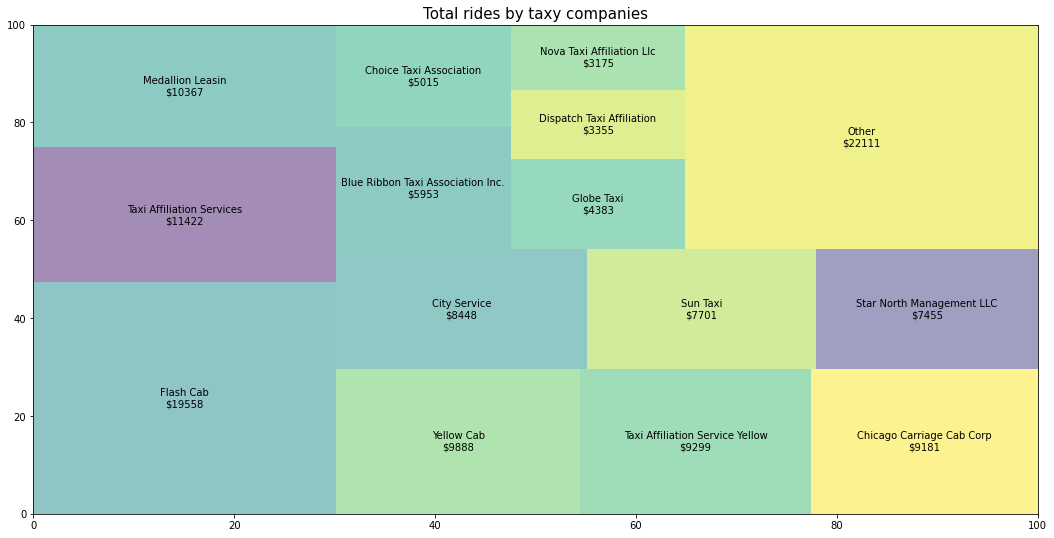

In [25]:
#Plotting the graph
plt.figure(figsize=(18,9))
squarify.plot(sizes=sizes, label=labels, alpha=0.5)

# Add labels
plt.title('Total rides by taxy companies',fontsize=15)
plt.show()

* It's clear that a few taxy companies are really popular, and must of the rides are made by them.
* The Flash Cab	company is the popular one, with a total amout of 19558 dollars. That's a really nice amount taking in concideration that the average of total amount for all the companies toguether is 2145 dollars.

  * Top 10 neighborhoods by number of dropoff

In [26]:
#Making a new table only with the Top 10 neighborhoods by number of dropoff
data_trips_neighborhoods = data_trips.sort_values(by="average_trips",ascending=False).head(10)

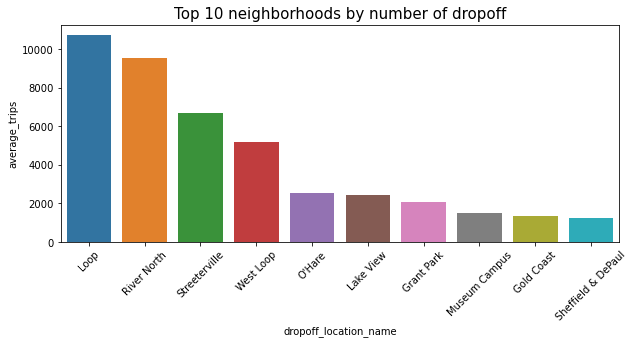

In [27]:
#Plotting a graph  
fig, ax = plt.subplots(figsize=(10,4))
x = sns.barplot(x = data_trips_neighborhoods.dropoff_location_name, y = data_trips_neighborhoods.average_trips)
x.set_title('Top 10 neighborhoods by number of dropoff', fontdict={'size':15})
ax.set_xticklabels(data_trips_neighborhoods.dropoff_location_name, rotation=(45))
plt.show()

* It's clear that a few neighborhoods are really popular, and must of the rides ended in this Chicago neighborhoods.
* The Loop neighborhood is leading, but also the River North, Streeterville and West Loop neighborhoods are popular.

# Testing hypotheses

Testing the hypothesis:
<br>
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
<br>
* H0: Average duration of rides from the Loop to O'Hare International Airport in rainy days equal to the Average duration of rides from the Loop to O'Hare International Airport in days that are no rainy.
* H1: Average duration of rides from the Loop to O'Hare International Airport in rainy days is different to the Average duration of rides from the Loop to O'Hare International Airport in days that are no rainy.

#### First we will slice the data  using the weather_conditions : we are determining the two populations.

In [28]:
data_duration_bad = data_airport.query('weather_conditions == "Bad"')
data_duration_good = data_airport.query('weather_conditions == "Good"')

#### Let's take a look at the  duration of rides distribution for our two samples. #### 

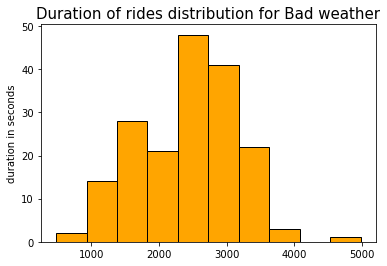

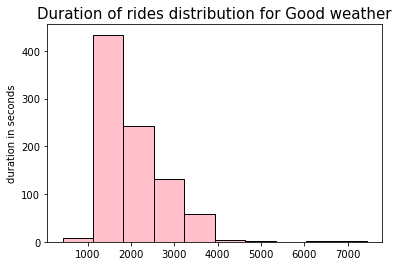

In [29]:
# matplotlib histogram for weather_conditions == "Bad"
plt.hist(data_duration_bad['duration_seconds'], color = 'orange', edgecolor = 'black', bins =10)        
plt.title('Duration of rides distribution for Bad weather',fontsize=15)
plt.ylabel('duration in seconds') 
#plot the histograms 
plt.show()

# matplotlib histogram for weather_conditions == "Good"
plt.hist(data_duration_good['duration_seconds'], color = 'pink', edgecolor = 'black', bins = 10)         
# Add labels
plt.title('Duration of rides distribution for Good weather',fontsize=15)
plt.ylabel('duration in seconds') 
#plot the histograms 
plt.show()

The distribution of our data is no normal for the two samples. And we have here two un-paired samples. For this reason we will use the Mann-Whitney U test to assess whether there is a statistically significant difference between averages duration of rides in rainy days and days with out rain. 
<br>
A Mann-Whitney U test is used to compare the differences between two independent samples when the sample distributions are not normally distributed.
We are taling about a one tail hypotheses

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
It will be nice to visualize data mining (Duration distributions by weather conditions).
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you formulated the null and alternative hypotheses clearly before the statistical test.
</div>

**Time to test the hypotheses** 

In [30]:
# define the two independent samples
duration_bad = data_airport.query('weather_conditions == "Bad"').duration_seconds
duration_good = data_airport.query('weather_conditions == "Good"').duration_seconds

# compare samples
stat, p = mannwhitneyu(duration_bad, duration_good)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution ( We cant reject the null hypothesis )')
else:
    print('Different distribution ( We reject the null hypothesis )')


Statistics=51646.500, p=0.000
Different distribution ( We reject the null hypothesis )


As we can see above, we can't reject the null hypothesis:  Average duration of rides from the Loop to O'Hare International Airport in rainy days equal to the Average duration of rides from the Loop to O'Hare International Airport in days that are no rainy.

This sounds logical, The O'Hare International Airport is an international airport located on the Northwest Side of Chicago, Illinois, and most of the days in this area are no rainy days. Also, it's logical that in rainy days people decide to cancel their flights.

# Overall conclusion

* We now from previous analysis that in November 1-7, 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Here we saw that in November 15-16, 2017 the companies Flash Cab and Taxi Affiliation Services were also the most popular, with the greater number of rides. We can concluide tha this company is really popular. Zuber should considerate take a closer look at these companies in order to learn from them and understand what is the key of their success.
* Zuber most consider the Top 10 neighborhoods by number of dropoff we found in these analyzes, and also look for for top 10 popular neighborhoods by number of dropoff from different starting points. Why? Because Zuber is a new ride-sharing company that's launching in Chicago, and will be easy makes ride-sharing from populars neighborhoods to popular neighborhoods.
* Zuber should take in consideration that days with bad weather possible makes people stay home. We recommend to take a closer look at this information and look for more information in order to find a good plan to make work profitable also in bad weather days.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please describe all main results of the project (data preparation, anomalies, main findings and so on)?
    
The conclusion is intended to help the reader understand why your research should matter to them after they have finished reading the paper. A conclusion is not merely a summary of your points or a re-statement of your research problem but a synthesis of key points. 
</div>